# Exploration of Airbnb Seattle Dataset
## by datacamp442

## Introduction

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

In this work we will analyse the Airbnb Seattle dataset of 2016. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

# set the display.max_colwidth option in order to display the information fully
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 01 Data Load

The following Airbnb activity is included in this Seattle dataset:

* Listings, including full descriptions and average review score 
* Reviews, including unique id for each reviewer and detailed comments 
* Calendar, including listing id and the price and availability for that day 

First we load the data of listings and reviews. We omit the calendar data because we do not need them for this further analysis.

In [2]:
# define color palette used in this exploration
color_seattle = sb.color_palette("viridis")

In [3]:
# load in the datasets into a pandas dataframe
seattle_listings = pd.read_csv('listings.csv')

In [4]:
# load in the datasets into a pandas dataframe
seattle_reviews = pd.read_csv('reviews.csv')

#### 02 Visual assessment - seattle_listings

We start with a visual assessment of the data. Please note, that all data has been additionally assessed in the external application Microsoft Excel.

In [5]:
seattle_listings.sample(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
108,2950213,https://www.airbnb.com/rooms/2950213,20160104002432,2016-01-04,Entire artist's apt in hip hood,"In vibrant Ballard neighborhood, this charming...","In a historically designated, 1893 landmark bu...","In vibrant Ballard neighborhood, this charming...",none,"On a tree lined, brick street filled with rest...",no Children under 15,Nearby bus lines provide a 17 minute downtown ...,https://a0.muscache.com/ac/pictures/40041280/0...,https://a0.muscache.com/im/pictures/40041280/0...,https://a0.muscache.com/ac/pictures/40041280/0...,https://a0.muscache.com/ac/pictures/40041280/0...,15060417,https://www.airbnb.com/users/show/15060417,Ginny,2014-05-03,"Seattle, Washington, United States",NaN,within an hour,100%,100%,t,https://a0.muscache.com/ac/users/15060417/prof...,https://a0.muscache.com/ac/users/15060417/prof...,Ballard,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"20th Avenue Northwest, Seattle, WA 98107, Unit...",Ballard,Adams,Ballard,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$200.00,"$1,500.00","$5,500.00",$150.00,NaN,4,$100.00,2,90,3 weeks ago,t,29,59,88,88,2016-01-04,35,2014-06-14,2015-11-02,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,t,flexible,f,f,1,1.84


After performing the visual analysis, I will focus on some information in the dataset. To do this, I remove some for me unnecessary column. 
For my further analysis I don't need the columns that contain a URL. These will be removed:

In [6]:
# delete all columns names that contain "url"
for col in seattle_listings.columns:
    if 'url' in col:
        del seattle_listings[col]

Now let's look at the data using programmatic assessment. 

#### 03 Programmatic assessment - seattle_listings

##### 03.01 Shape

In [7]:
# use function shape to 
seattle_listings.shape

(3818, 84)

The data set now contains 3818 entries and 84 columns (92 before removing URL's). 

Now let's check if there are any duplicates in the datasets. 

##### 03.02 Duplicates

In [8]:
# show the sum of duplicated values
seattle_listings.duplicated().sum()

0

There are no duplicates in the records. 

##### 03.04 Unique Values

Now we check which columns only have unique values. 
These can be removed as they only contain constant information.

In [9]:
# show all columns names that have only one unique value
# iterating the columns
for col in seattle_listings.columns:
    if seattle_listings[col].nunique() <= 1:
        print (f"There was in {col} only one unique value: {seattle_listings[col].unique()[0]}")
        del seattle_listings[col]

There was in scrape_id only one unique value: 20160104002432
There was in last_scraped only one unique value: 2016-01-04
There was in experiences_offered only one unique value: none
There was in market only one unique value: Seattle
There was in country_code only one unique value: US
There was in country only one unique value: United States
There was in has_availability only one unique value: t
There was in calendar_last_scraped only one unique value: 2016-01-04
There was in requires_license only one unique value: f
There was in license only one unique value: nan
There was in jurisdiction_names only one unique value: WASHINGTON


##### 03.03 Null-Values

Now let's examine the data set for null values:

In [10]:
# detect missing values using isnull()
seattle_listings.isnull().sum().sort_values(ascending=False)

square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_checkin                658
review_scores_accuracy               658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
first_review                         627
last_review                          627
reviews_per_month                    627
space                                569
host_response_rate                   523
host_response_time                   523
neighbourhood                        416
host_neighbourho

##### 03.03.01 Delete unnecessary columns

There are some columns with missing data, that I don't need for my further analysis or are redundant, as other columns carry the same information
(e.g. `neighbourhood`).

In [11]:
# drop unnecessary columns from dataframe
seattle_listings = seattle_listings.drop(['neighbourhood', 'summary', 'host_neighbourhood', 'zipcode', 
                                         'host_location', 'space', 'first_review', 'last_review', 
                                         'reviews_per_month'], axis=1)

##### 03.03.01 Delete specific lines with NaN

Some values in the column `review_scores_rating` are missing. It could be that they are new and actually haven't received any reviews yet. I will save this data in a separate file to be used for predictions if necessary and delete them from the master file.

In [12]:
# save new homes without review in a separate dataframe
seattle_listings_new_homes = seattle_listings.query('review_scores_rating.isnull()')

In [13]:
# drop new homes without review of the master dataframe
seattle_listings= seattle_listings.dropna(subset = ['review_scores_rating'])

In [14]:
# detect missing values using isnull()
seattle_listings.isnull().sum().sort_values(ascending=False)

square_feet                         3080
monthly_price                       1815
security_deposit                    1561
weekly_price                        1379
notes                               1184
cleaning_fee                         759
neighborhood_overview                738
transit                              644
host_about                           577
host_acceptance_rate                 477
host_response_time                   312
host_response_rate                   312
bathrooms                             12
review_scores_accuracy                11
review_scores_checkin                 11
review_scores_value                    9
review_scores_location                 8
bedrooms                               6
review_scores_cleanliness              6
review_scores_communication            4
review_scores_rating                   0
require_guest_phone_verification       0
require_guest_profile_picture          0
cancellation_policy                    0
instant_bookable

##### 03.03.02 Fill dummy variables to NaNs

Some of this NaN-Values can be padded with values. If the information about `security_deposit` and `cleaning_fee`  was not filled out, it can be assumed that these do not exist and can be set 0. Furthermore, it is implausible that the apartments do not have  `bathrooms` or `bedrooms`. Therefore I add 1 to the NaN value..

To fill in this data efficiently, we define a function:

In [15]:
# define funcion to fill empty entries with a specific value in a defined column
def fill_empty_entries(x, df, y):
    '''
    INPUT:
    df - pandas dataframe 
    x - vector of columns with empty entries
    y - specific value to use to fill NaN-Values of columns x
    
    OUTPUT:
    df2 - a new dataframe where all empty entries of the columns defined in x 
        are filled with y.
    '''    
    df2 = df.copy()
    for c in x:
        df2[c] = df[c].fillna(y)
    return df2

In [16]:
# define columns where NaN-Values should be filled 
char_columns_Fee = ["security_deposit","cleaning_fee"]

In [17]:
# define columns where NaN-Values should be filled 
char_columns_room = ['bedrooms','bathrooms']

In [18]:
# use function fill_empty_entries to fill NaN-Values with "0"
seattle_listings = fill_empty_entries(char_columns_Fee,seattle_listings,'0')

In [19]:
# use function fill_empty_entries to fill NaN-Values with "1"
seattle_listings = fill_empty_entries(char_columns_room,seattle_listings,'1')

Data is also missing in column 'host_response_time'. It contains categories of how long it took for the host to get back to you. Let's look at the distribution of the categories in the data set:

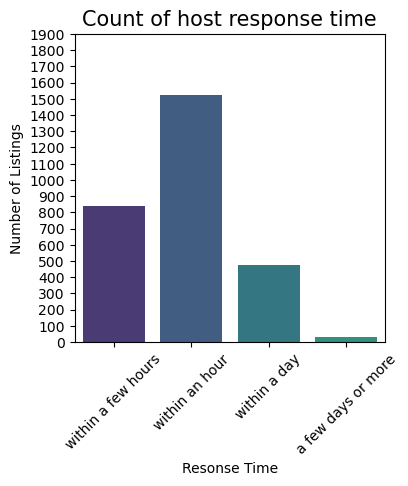

In [20]:
# plot histogram host_response_rate

# plot a countplot 
plt.figure(figsize=[4, 4])

ax = sb.countplot(data = seattle_listings, x='host_response_time', palette=color_seattle)
ax.set_title('Count of host response time', fontsize=15)
plt.yticks(np.arange(0, 2000, step=100))
plt.xticks(rotation= 45)

plt.xlabel('Resonse Time')
plt.ylabel('Number of Listings')

plt.show();


From my point of view, it makes sense to overwrite the NaN values ​​with the most frequently occurring category, so I decide to set the NaN values ​​to "within an hour".

In [21]:
# define column to be changed
char_columns_time = ["host_response_time"] 

In [22]:
# use function fill_empty_entries to fill NaN-Values with "Unknown"
seattle_listings=  fill_empty_entries(char_columns_time,seattle_listings,'within an hour')

##### 03.03.03 Fill value of other column to NaNs

Let's now check the remaining NaN values. To do this, we display the NaN values ​​in a barplot:

In [23]:
#drop the column that do not have any NaN/None values and count NaN for each column
na_counts =seattle_listings[seattle_listings.columns[seattle_listings.isnull().any()]].isna().sum().sort_values(ascending = False)

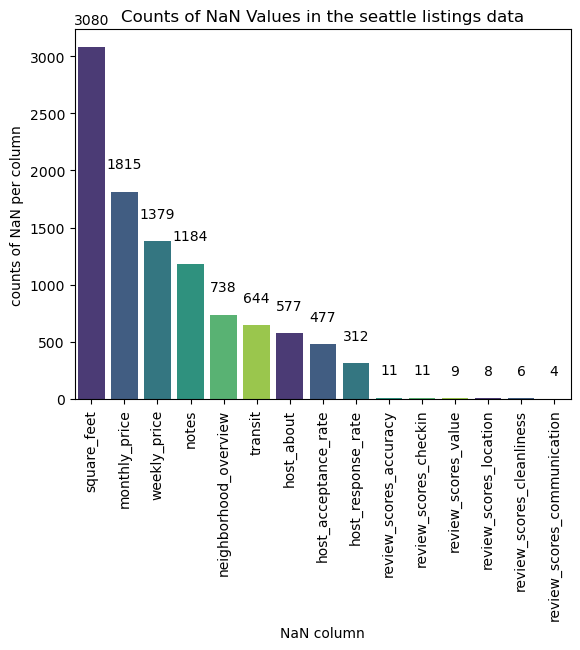

In [24]:
#Plot the bar chart from the NaN tabular data
sb.barplot(x=na_counts.index.values, y=na_counts, palette=color_seattle)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# define label
plt.xlabel('NaN column')
plt.ylabel('counts of NaN per column')
#define title
plt.title('Counts of NaN Values in the seattle listings data')

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

It makes sense to replace the missing values ​​in the review_scores with the tenth value of the `review_scores_rating`, as this value represents the overall impression of the accommodation.

In [25]:
# define funcion to fill empty entries with the tenth of a specific value in a defined column
def fill_empty_review_scores(x, df, col):
    '''
    INPUT:
    df - pandas dataframe 
    x - vector of columns with empty entries
    col - column of df to use to fill NaN-Value
    
    OUTPUT:
    df2 - a new dataframe where all empty entries of the columns defined in x 
        are filled with the tenth of the corresponding value in col.
    '''    
    df2 = df.copy()
    for c in x:
        df2[c] = df[c].fillna(round(df2[col]/10))
    return df2

In [26]:
# define vector with review scores labels
review_scores = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_value', 'review_scores_location',
                 'review_scores_cleanliness', 'review_scores_communication']

In [27]:
# fill empty entries of the review scores with the tenth of the review_scores_rating
seattle_listings = fill_empty_review_scores(review_scores,seattle_listings,'review_scores_rating')

##### 03.03.04 Handle columns with high NaN proportion

Now I want to define a funcion to find columns of a dataframe, where the proportion of empty entries are equal and higher than a defined threshold:

In [28]:
# define funcion to find columns of a dataframe,  
# where the proportion of empty entries are equal and higher than a defined threshold

def find_empty_entries(df, y):
    '''
    INPUT:
    df - pandas dataframe 
    y - percentage threshold of NaN-Values
    
    OUTPUT:
    - columns, where the proportion of null values is higher than the given threshold y
    - columns proportion of null values as 'NAN_Proportion'
    
    '''    
    # calculate the proportion of null values each column and save it as a dataframe
    Prop_NAN = (np.sum(df.isnull(), axis=0)/df.shape[0]).to_frame(name="NAN_Proportion")
    
    # return the sorted result where the proportion is higher than the given threshold y 
    return Prop_NAN[Prop_NAN['NAN_Proportion'] >= y].sort_values(by = 'NAN_Proportion', ascending=False)

I want to display all entries, that have more tha 15% missing values: 

In [29]:
#detect columns with more than 15% missing values
find_empty_entries(seattle_listings, .15)

,NAN_Proportion
square_feet,0.971302
monthly_price,0.572375
weekly_price,0.434879
notes,0.373384
neighborhood_overview,0.232734
transit,0.203091
host_about,0.181962
host_acceptance_rate,0.150426


Most of the values ​​displayed are not relevant for my further analysis. Only the `host_acceptance_rate` is worth further consideration. Let's display the distribution of values ​​in column `host_acceptance_rate`:

In [30]:
#display the distribution of values ​​in column host_acceptance_rate
seattle_listings['host_acceptance_rate'].value_counts()

host_acceptance_rate
100%    2693
0%         1
Name: count, dtype: int64

Let's go deeper into the analysis. Let’s look at the number of reviews published and the overall rating of the property

In [31]:
# display the number of reviews published and the overall rating of the property
print("The number of reviews of that listing id with 0% acceptance rate was:")
print(seattle_listings.loc[seattle_listings['host_acceptance_rate'] == "0%"].number_of_reviews)
print("The review score rating of that listing id with 0% acceptance rate was:")
print(seattle_listings.loc[seattle_listings['host_acceptance_rate'] == "0%"].review_scores_rating)

The number of reviews of that listing id with 0% acceptance rate was:
2920    6
Name: number_of_reviews, dtype: int64
The review score rating of that listing id with 0% acceptance rate was:
2920    100.0
Name: review_scores_rating, dtype: float64


Since the accommodation achieved a rating of 100% with 6 secured overnight stays, the acceptance rate of 0% can only be an error. Therefore, as `host_acceptance_rate` seems to be a column with constant values, I decide to delete all entries with more than 15% missing entries.

In [32]:
# Save columns with more than 15% missing values as a list
seattle_listings_NAN_col = find_empty_entries(seattle_listings, .15).index.to_list()

# Delete columns with more than 15% missing values and save dataframe in a temporary file
seattle_listings = seattle_listings.drop(columns = seattle_listings_NAN_col)

##### 03.03.05 Impute NaN values with their mean

Let's check again, how many columns with missing values are left:

In [33]:
# detect missing values using isnull()
seattle_listings[seattle_listings.columns[seattle_listings.isnull().any()]].isna().sum().sort_values(ascending = False)

host_response_rate    312
dtype: int64

Only `host_response_rate` is left. Let's look on the values of `host_response_rate`.

In [34]:
# show some sample of 'host_response_rate'
seattle_listings['host_response_rate'].sample(5)

2199    100%
1679     67%
3171     NaN
3499    100%
1402    100%
Name: host_response_rate, dtype: object

I decided to fill in the missing values ​​with the mean. However, the values ​​must first be converted into floats. To do this, we also need to remove the % characters before we can impute.

In [35]:
# remove the $ characters and covert to floats
seattle_listings['host_response_rate']= seattle_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [36]:
# impute with the mean
seattle_listings['host_response_rate']= seattle_listings['host_response_rate'].fillna(round(seattle_listings['host_response_rate'].mean(), 2))

In [37]:
# final check if there are NaN-Values left:
seattle_listings.isnull().any().sum()

0

##### 03.04 Datatypes

As we already saw with the column `host_response_rate`, a lot of data seems to be defined as an object. We display all the data defined as an object and decide how to proceed:

In [38]:
# print all columns defined as object
seattle_listings.select_dtypes('O').columns.to_list()

['name',
 'description',
 'host_name',
 'host_since',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'smart_location',
 'is_location_exact',
 'property_type',
 'room_type',
 'bathrooms',
 'bedrooms',
 'bed_type',
 'amenities',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

Some of the data are categories. Let's set the data type as category.

In [39]:
# define categorical columns to be changed
cat_col = ['host_response_time','property_type',
 'room_type','bed_type','calendar_updated','cancellation_policy']

# Change categorical data from object to category
for c in cat_col:
    seattle_listings[c] = seattle_listings[c].astype("category")

There is also numerical data that needs to be converted:

In [40]:
# define numerical columns to be changed
num_col = ['bathrooms','bedrooms','beds']

# Change numerical data from object to float
for c in num_col:
    seattle_listings[c] = seattle_listings[c].astype("float")

The price data is with currency symbols ($). Before we can convert the prices to float, we first need to remove the currency symbols and the commas used as currency separators:

In [41]:
# define price columns to be changed
dollar_col = ['price','security_deposit','cleaning_fee','extra_people']

# Remove $ and change datatype from object to float
for c in dollar_col:
    seattle_listings[c] = seattle_listings[c].str.replace('$', '').str.replace(',', '').astype("float")

Other columns are filled with f = False and t = True. We replace this data with 0 and 1 and convert it to integer.

In [42]:
# define True/False columns to be changed
true_false_col = ['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'is_location_exact',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

# Change f = 0 and t=1 and change datatype from object to int
for c in true_false_col:
    seattle_listings[c] = seattle_listings[c].replace(['f','t'] ,['0','1'] ).astype("int")

`host_since` is a date column. Let's also convert this column to the correct data type datetime:

In [43]:
# change datatype from object to datetime
seattle_listings['host_since'] = pd.to_datetime(seattle_listings['host_since'])

Now let's check the remaining columns whose data type is displayed as an object:

In [44]:
# print all columns defined as object
seattle_listings.select_dtypes('O').columns.to_list()

['name',
 'description',
 'host_name',
 'host_verifications',
 'street',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'smart_location',
 'amenities']

The data fields `host_verifications` and `amenities` are lists. We will process `amenities` later. The remaining columns contain text and are therefore correctly stored as a string.

##### 03.05 Outliers

Now we examine the data set for outliers. To do this we use the “describe” function:

In [45]:
# Use .describe() to check on outliers or inplausible values
seattle_listings.describe()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
count,3.171000e+03,3.171000e+03,3171,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,5.017752e+06,1.437149e+07,2013-08-10 14:14:11.466414336,0.952012,0.236834,6.933459,6.933459,0.998423,0.819931,47.628684,-122.332870,0.906969,3.384421,1.257963,1.302113,1.742353,126.802586,141.853674,46.357616,1.708294,11.347524,2.395774,753.925576,16.965941,37.428256,59.277515,249.134342,26.751498,94.539262,9.635446,9.555976,9.785557,9.809208,9.608641,9.452539,0.170293,0.093031,0.109745,2.990224
min,4.291000e+03,4.193000e+03,2008-11-10 00:00:00,0.170000,0.000000,1.000000,1.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.694596e+06,3.074414e+06,2012-07-27 00:00:00,0.950000,0.000000,1.000000,1.000000,1.000000,1.000000,47.608762,-122.353981,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,0.000000,6.500000,1.000000,0.000000,1.000000,31.000000,3.000000,18.000000,33.000000,140.500000,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000
50%,5.289293e+06,9.469827e+06,2013-10-18 00:00:00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,47.623076,-122.328980,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,95.000000,35.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,74.000000,310.000000,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000
75%,7.454547e+06,2.347934e+07,2014-11-13 00:00:00,1.000000,0.000000,3.000000,3.000000,1.000000,1.000000,47.662419,-122.310570,1.000000,4.000000,1.000000,2.000000,2.000000,150.000000,200.000000,70.000000,2.000000,20.000000,2.000000,1125.000000,29.000000,59.000000,88.000000,358.000000,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000
max,1.024814e+07,5.076344e+07,2015-12-07 00:00:00,1.000000,1.000000,502.000000,502.000000,1.000000,1.000000,47.733358,-122.254189,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,5000.000000,300.000000,13.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,37.000000
std,2.801376e+06,1.343307e+07,NaN,0.107128,0.425207,25.541214,25.541214,0.039684,0.384306,0.042962,0.031571,0.290521,1.991495,0.593468,0.873836,1.154951,90.007172,234.643791,49.580513,1.308209,18.003671,17.850468,1836.189972,11.894520,22.698243,32.908399,122.422523,39.914223,6.606083,0.698935,0.797633,0.597096,0.568792,0.629787,0.750522,0.375950,0.290521,0.312620,5.955426


The statement that the accommodation must be booked for at least 1000 days is implausible. Let's take a closer look at the distribution of the `minimum nights` column:

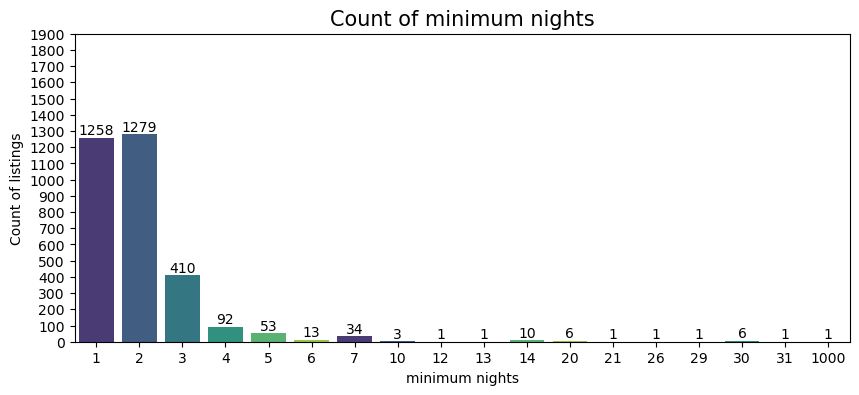

In [46]:
# plot countplot for minimum nights

plt.figure(figsize=[10,4])

ax = sb.countplot(data = seattle_listings, x='minimum_nights', palette=color_seattle)
ax.bar_label(ax.containers[0])

#define title
ax.set_title('Count of minimum nights', fontsize=15)

#define yticks
plt.yticks(np.arange(0, 2000, step=100))

# define labels
plt.xlabel('minimum nights')
plt.ylabel('Count of listings')

plt.show();



The minimum booked nights range from 1 to 31. I assume that the value 1000 is incorrect and so I change it to the next most commonly used value of 30 days.

In [47]:
# replace outlier 
seattle_listings['minimum_nights'] = seattle_listings['minimum_nights'].replace(1000,30)

The fields `host_listings_count` and `host_total_listings_count` with a maximum value of 502 are also unusual. We display the associated accommodations:

In [48]:
# check entry of the outlier
seattle_listings.loc[seattle_listings['host_listings_count'] == 502]

,id,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1219,6370313,Luxury Furnished 1BR Seattle Apt,Inside this apartment guests will find a fully...,30283594,Kara,2015-03-30,within a few hours,0.97,0,502.0,502.0,"['email', 'phone', 'reviews', 'jumio']",1,1,"Westlake Avenue, Seattle, WA 98101, United States",Belltown,Downtown,Seattle,WA,"Seattle, WA",47.614294,-122.336390,1,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",249.0,0.0,100.0,1,0.0,5,1125,5 weeks ago,30,60,89,89,4,55.0,7.0,7.0,5.0,6.0,10.0,7.0,0,strict,0,0,2
1334,6370655,Luxury Furnished 2BR Seattle Apt,Inside this apartment guests will find a fully...,30283594,Kara,2015-03-30,within a few hours,0.97,0,502.0,502.0,"['email', 'phone', 'reviews', 'jumio']",1,1,"Westlake Avenue, Seattle, WA 98101, United States",Belltown,Downtown,Seattle,WA,"Seattle, WA",47.614014,-122.337793,1,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",399.0,0.0,150.0,2,15.0,3,365,today,30,60,89,89,2,80.0,9.0,9.0,7.0,7.0,9.0,8.0,0,strict,0,0,2


If you check the value `calculated_host_listings_count`, it seems to have more significance with a value of 2 here in this data set. I therefore decided to delete the columns `host_listings_count` and `host_total_listings_count` and continue working with the values ​​from column `calculated_host_listings_count`.

In [49]:
# drop host_listings_count and host_total_listings_count
seattle_listings = seattle_listings.drop(['host_listings_count', 'host_total_listings_count'], axis=1)

Let's do one last check on outliers:

In [50]:
# Use .describe() to check on outliers or inplausible values
seattle_listings.describe()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
count,3.171000e+03,3.171000e+03,3171,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,5.017752e+06,1.437149e+07,2013-08-10 14:14:11.466414336,0.952012,0.236834,0.998423,0.819931,47.628684,-122.332870,0.906969,3.384421,1.257963,1.302113,1.742353,126.802586,141.853674,46.357616,1.708294,11.347524,2.089877,753.925576,16.965941,37.428256,59.277515,249.134342,26.751498,94.539262,9.635446,9.555976,9.785557,9.809208,9.608641,9.452539,0.170293,0.093031,0.109745,2.990224
min,4.291000e+03,4.193000e+03,2008-11-10 00:00:00,0.170000,0.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.694596e+06,3.074414e+06,2012-07-27 00:00:00,0.950000,0.000000,1.000000,1.000000,47.608762,-122.353981,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,0.000000,6.500000,1.000000,0.000000,1.000000,31.000000,3.000000,18.000000,33.000000,140.500000,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000
50%,5.289293e+06,9.469827e+06,2013-10-18 00:00:00,1.000000,0.000000,1.000000,1.000000,47.623076,-122.328980,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,95.000000,35.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,74.000000,310.000000,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000
75%,7.454547e+06,2.347934e+07,2014-11-13 00:00:00,1.000000,0.000000,1.000000,1.000000,47.662419,-122.310570,1.000000,4.000000,1.000000,2.000000,2.000000,150.000000,200.000000,70.000000,2.000000,20.000000,2.000000,1125.000000,29.000000,59.000000,88.000000,358.000000,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,2.000000
max,1.024814e+07,5.076344e+07,2015-12-07 00:00:00,1.000000,1.000000,1.000000,1.000000,47.733358,-122.254189,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,5000.000000,300.000000,13.000000,300.000000,31.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,37.000000
std,2.801376e+06,1.343307e+07,NaN,0.107128,0.425207,0.039684,0.384306,0.042962,0.031571,0.290521,1.991495,0.593468,0.873836,1.154951,90.007172,234.643791,49.580513,1.308209,18.003671,2.199612,1836.189972,11.894520,22.698243,32.908399,122.422523,39.914223,6.606083,0.698935,0.797633,0.597096,0.568792,0.629787,0.750522,0.375950,0.290521,0.312620,5.955426


In [51]:
# display the shape of the dataframe after cleaning
seattle_listings.shape

(3171, 54)

There are no other outliers to be found. The data size after cleaning is now 3171 rows and 54 columns.

#### 04 Visual assessment - seattle_reviews

We start with a visual assessment of the data. Please note, that all data has been additionally assessed in the external application Microsoft Excel.

In [52]:
# show some samples of the dataframe
seattle_reviews.sample(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
40035,1163345,7464194,2013-09-21,8344598,Min Kyoung,Darcy and Sean is a very very nice!!\r\nA desc...
13118,215882,1557060,2012-06-25,2433259,Tessa,Very nice place and within a few minutes drive...
57160,3031415,19886130,2014-09-20,20323476,Anne,The house was great. We were all pleasantly su...


#### 05 Programmatic assessment - seattle_reviews

We continue with the program-assisted analysis:

##### 05.01 Shape

In [53]:
# use function shape to show the shape of the dataset
seattle_reviews.shape

(84849, 6)

The data set contains 84849 entries and 6 columns. 

Let's check if there are any duplicates in the datasets. 

##### 05.02 Duplicates

In [54]:
# show the sum of duplicated values
seattle_reviews.duplicated().sum()

0

There are no duplicates in the records. 

##### 05.03 Null-Values

Now we examine the data set for null values:

In [55]:
# detect missing values using isnull()
seattle_listings.isnull().sum().any()

False

There are no NaN values in the records. 

##### 05.04 Datatypes

We continue by examining the data types.

In [56]:
# use info() to get information about data types
seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


`date` is a date column. Let's also convert this column to the correct data type datetime:

In [57]:
# change column date from string to datetime
seattle_reviews['date'] = pd.to_datetime(seattle_reviews['date'])
# save cleanded dataset
seattle_reviews_clean = seattle_reviews

## Summary of the data cleaning

The original seattle listings data set contains 92 information on 3818 accommodations in Seattle. 

The data not only contains information about the accommodation, but also information about the host and the rating points made by the guests.

This information is reflected in various data types:

Qualitative or categorical types (non-numeric types)
1. Nominal data (e.g. `host_name`)
2. Ordinal data (e.g. entries of `host_response_time`)

Quantitative or numeric types

3. Discrete data (e.g. number of bathrooms in column `bathrooms`)
4. Continuous data (e.g. `price`)

After cleaning the data (dropping unnecessary columns, handling NaN Values) there remain 3171 entries and 54 columns.

### Main features of interest 

After analyzing the content of the seattle listings data set, this work examines
- the extent to which the communication score depends on the gender of the host and the response time,
- the extent to which the cleaning score depends on the gender of the host and the cleaning fee,
- if we can build a machine learning model to predict a price and check which features have the most influence on the price.

Finally we generate a word cloud picture for our blog post with the most commonly used phrases in reviews of top rated accommodations.


## Exploration of host's gender

### Derive host's gender
Let's now examine whether the host's gender has an influence on therevieww score and and other related datas.
Unfortunately, the data set only contains the first names of the hosts, but not the gender. Therefore, we usthe package `gender_guesser`on that derives the gender based on the first name:

In [58]:
!pip install gender_guesser
!pip install xlrd
!pip install openpyxl

In [59]:
import gender_guesser.detector as gender

The result of the gender.Detector will be one of unknown (name not found), andy (androgynous), male, female, mostly_male, or mostly_female. 
The difference between andy and unknown is that the former is found to have the same probability to be male 
than to be female, while the later means that the name wasn’t found in the database.

In [60]:
# use gender.Detector to derive the gender of the first name
gd = gender.Detector('us')

# save result in a new column "gender" 
seattle_listings['gender'] = seattle_listings['host_name'].map(lambda x: gd.get_gender(x)).astype("category")


In [61]:
# show results
seattle_listings['gender'].value_counts()

gender
female           1226
male             1007
unknown           608
mostly_female     144
mostly_male       137
andy               49
Name: count, dtype: int64

The function could not identify some first names. Let's check the unknown first names and try to clean them up.

In [62]:
# save and show unknown names 
unknown_names = seattle_listings['host_name'].loc[seattle_listings['gender'] == 'unknown']
unknown_names.sort_values().sample(5)

2169            Lori & Rob
3090                Kalani
635          Eula & Marvin
1335    Sea To Sky Rentals
3638      Margot & Anthony
Name: host_name, dtype: object

It looks like some couples or families are listed as `host_name`s. These can be identified, for example, searching for +, &, AND. Some companies also appear to be acting as hosts. Therefore, let's define two more categories, couple and company. Additional names can be manually assigned to the genders using the visual inspection:

In [63]:
# search for &, AND and set them as couple
seattle_listings['gender'] = np.where(
   (seattle_listings['gender'] == 'unknown') & (seattle_listings['host_name'].str.contains(' And |&')) , "couple", seattle_listings['gender']
   )

In [64]:
# define funcion to fill 'unknown' gender entries to a specific gender
def change_gender(x, df, gender):
    '''
    INPUT:
    df - pandas dataframe 
    x - list of names, where the 'unknown' entry in column gender should be changed
    gender - transfered gender
    
    OUTPUT:
    df2 - pandas dataframe, where the 'unknown' entry of the gender for the hosts in x was changed in y 
    '''    
    df2 = df.copy()
    df2['gender'] = np.where(
           (df2['gender'] == 'unknown') & (df2['host_name'].isin(x) == True), gender, df2['gender']
           )
    return df2

In [65]:
# define and change male host_names to gender 'male'
boys = ['Darik', 'Jean-Marc', 'Daniel James','Kumail', 'Varun', 'Vaibhav', 'Sanjaya', 'Fremont', 'Chasten', 'Ravendar', 'Garo','Tahoma', 'Heberto',
       'Kaiser', 'Michael F', 'Alberto Stein', 'Anthony Toto', 'Skip (Aka Scott)', 'Mr. Larry', 'Roger W', 'Miesha', 'Christo', 'Aexis', 
        'Michael Joseph', 'Kazami']

seattle_listings=change_gender(boys,seattle_listings, 'male' )

In [66]:
# define and change female host_names to gender 'female'
girls = ['Mercy', 'Angielena', 'Mehrit', 'Roda', 'Marne', 'Ann Petrich', 'Luyao', 'Riani', 'Siena', 'Magic', 'Darlene Tiki', 'Luna Farm', 
         'Lara-Ashley', 'Mayza', 'Sedora', 'Sunset', 'Gabbi', 'Jodi-Ann', 'Chelsy','Alianna', 'Claire L', 'Elfriede ( Elfie)', 'Lisa Marie',
        'Dawn Marie', 'Peach', 'Sue Ann', 'Debera', 'Breeze', 'BeckyJo', 'Jennie Kay', 'Kassy', 'Shanelle', 'Rose Michelle', 'Analisa',
        'Khristy', 'Sherill', 'Katha', 'Minako Xin Wei', 'Apryl', 'Maria C.', 'Amiee', 'Jordanna', 'Liping', 'Bri']
seattle_listings=change_gender(girls,seattle_listings, 'female' )

In [67]:
# define and change couple host_names to gender 'couple'
couple =['Andrew + Danielle', 'Dan + Suzanne', 'Melanie/Brian', 'Ed/Gretchen', 'Erik + Pamela', 'Piper + Kent', 'Mia (& Chris)','Quay&Wren','M&K' ]
seattle_listings=change_gender(couple,seattle_listings, 'couple' )

In [68]:
# define and change company host_names to gender 'company'
company = ['Ballard Odd Fellows', 'Sea To Sky Rentals', 'Seattle Unique Loft']
seattle_listings=change_gender(company,seattle_listings, 'company' )

I also decide to change the mostly female and mostly male entries to female and male respectively.

In [69]:
# change 'mostly female' and 'mostly male' results to 'female' and 'male'
seattle_listings['gender'] = seattle_listings['gender'].replace(['mostly_female', 'mostly_male', 'andy',] ,['female','male', 'unknown'] )

In [70]:
# change 'gender' datatype to category
seattle_listings['gender'] = seattle_listings['gender'].astype("category")

#### Exploration of gender distribution

Now let's look at the gender distribution in our data set and we answer the question of whether a gender is overrepresented in the cleaned dataset:

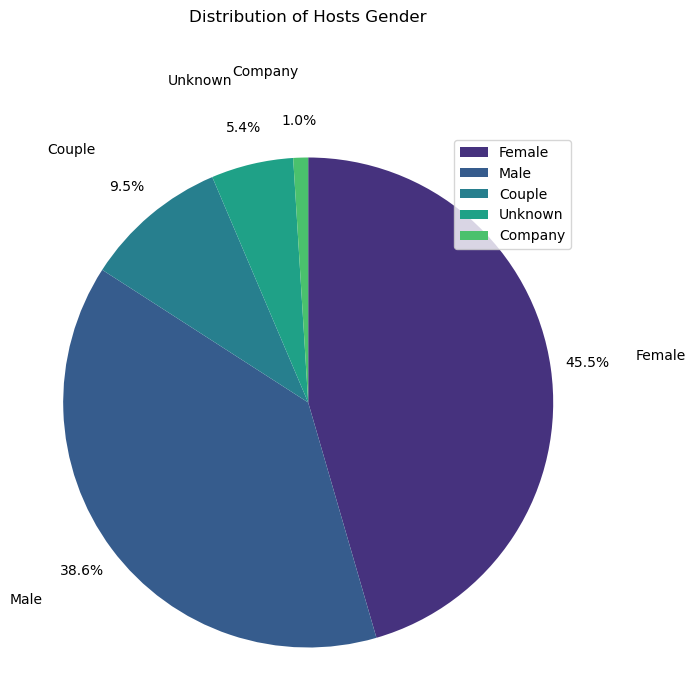

In [71]:
# plot pie chart 
labels = ['Female', 'Male', 'Couple','Unknown', 'Company']
plt.figure(figsize=[7, 7])
plt.pie(seattle_listings['gender'].value_counts(), labels=labels, autopct='%.1f%%', 
        colors = color_seattle, startangle=90, counterclock=False,pctdistance=1.15, labeldistance=1.35)
plt.axis('square')
plt.legend(loc = 'upper right')
plt.title('Distribution of Hosts Gender', pad=80);

In the majority of listed accommodations, the hosts are female with a 45.5% share and 38.6% are male. The next largest group is made up of couples with almost 10%, while professional companies form the clear minority with only 1% of the listed accommodations. In 5.4% of the listed accommodations, the gender could not be clearly determined.

For this reason, I will exclude unassignable accommodations from my further gender analysis.

In [72]:
#drop unknown information from column `gender` and save it in a separate dataframe seattle_listings_clean_gender
seattle_listings_clean_gender = (
  seattle_listings.loc[~seattle_listings["gender"].isin(["unknown"])]
  .astype({"gender": str}))


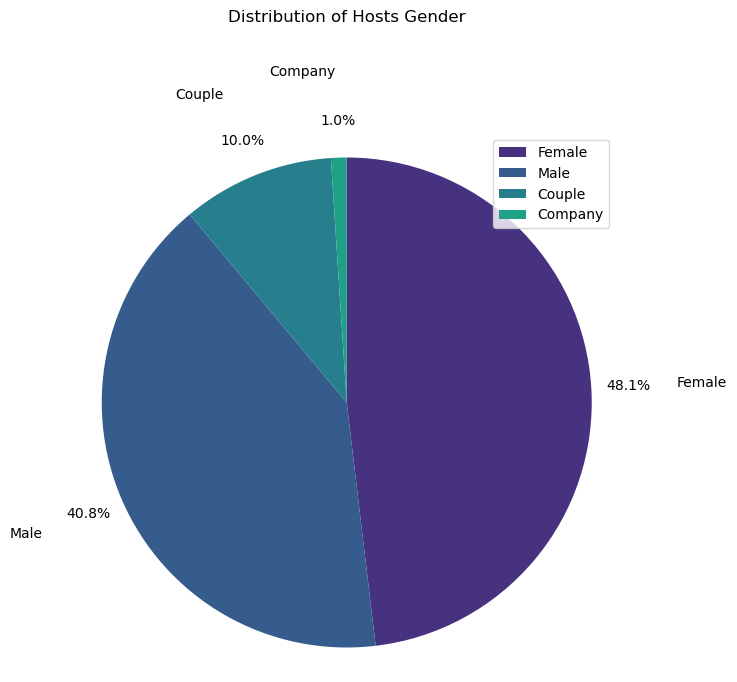

In [73]:
# plot pie chart 
labels = ['Female', 'Male', 'Couple', 'Company']
plt.figure(figsize=[7, 7])
plt.pie(seattle_listings_clean_gender['gender'].value_counts(), labels=labels, autopct='%.1f%%', 
        colors = color_seattle, startangle=90, counterclock=False,pctdistance=1.15, labeldistance=1.35)
plt.axis('square')
plt.legend(loc = 'upper right')
plt.title('Distribution of Hosts Gender', pad=80);

### Exploration of hosts `review_scores_communication` and `host_response_time` per `gender`

It is said that women can communicate better than men. So let's ask the question:
#### Do female hosts perform better than men when it comes to communication? 
#### Do they respond to queries faster than other groups?
Let's look at the average results in the communication score in the entire data set and in the individual groups:

In [74]:
#calculate the mean of review_scores
seattle_listings_clean_gender['review_scores_communication'].mean()

9.818272757585863

In [75]:
#calculate the mean of review_scoresm for every group
seattle_listings_clean_gender.groupby(['gender'])['review_scores_communication'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
company,31.0,9.709677,0.642575,8.0,10.0,10.0,10.0,10.0
couple,301.0,9.897010,0.382131,6.0,10.0,10.0,10.0,10.0
female,1443.0,9.799723,0.594193,2.0,10.0,10.0,10.0,10.0
male,1224.0,9.823529,0.533339,2.0,10.0,10.0,10.0,10.0


Surprisingly, the review score on communication of female hosts is below average. While male hosts are average, couples receive the highest ratings on average. For visualization purposes, we can display the histograms overlapping and side by side:

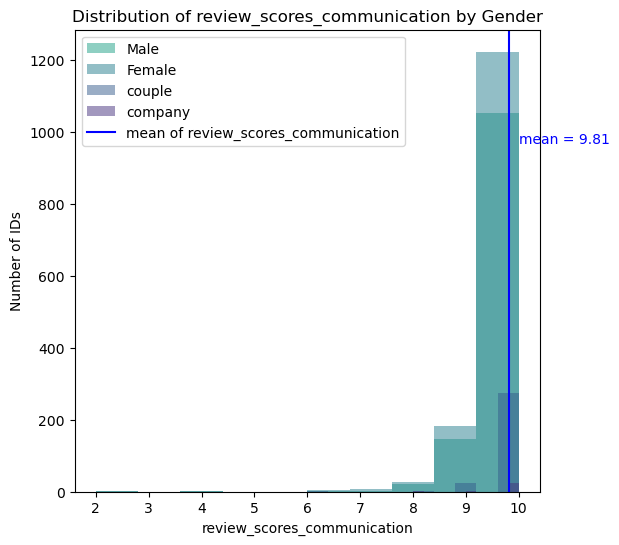

In [76]:
# Histogram for both males and females' maths scores

plt.figure(figsize=[6, 6])
plt.hist(data=seattle_listings[seattle_listings['gender']=='male'], x='review_scores_communication',  
         label='Male', alpha=0.5, color = color_seattle[3])
plt.hist(data=seattle_listings[seattle_listings['gender']=='female'], x='review_scores_communication',  
         label='Female', alpha=0.5, color = color_seattle[2])
plt.hist(data=seattle_listings[seattle_listings['gender']=='couple'], x='review_scores_communication',
         label='couple', alpha=0.5, color = color_seattle[1])
plt.hist(data=seattle_listings[seattle_listings['gender']=='company'], x='review_scores_communication',  
         label='company', alpha=0.5, color = color_seattle[0])

plt.axvline(seattle_listings['review_scores_communication'].mean(), color='b', label= 'mean of review_scores_communication')

plt.title('Distribution of review_scores_communication by Gender')

plt.xlabel('review_scores_communication')

plt.ylabel('Number of IDs')

plt.text(10, 1000, 'mean = {}'.format(round(seattle_listings['review_scores_communication'].mean(),2)), fontsize = 10, color = 'b',verticalalignment='top', horizontalalignment='left')

plt.legend()
plt.show()

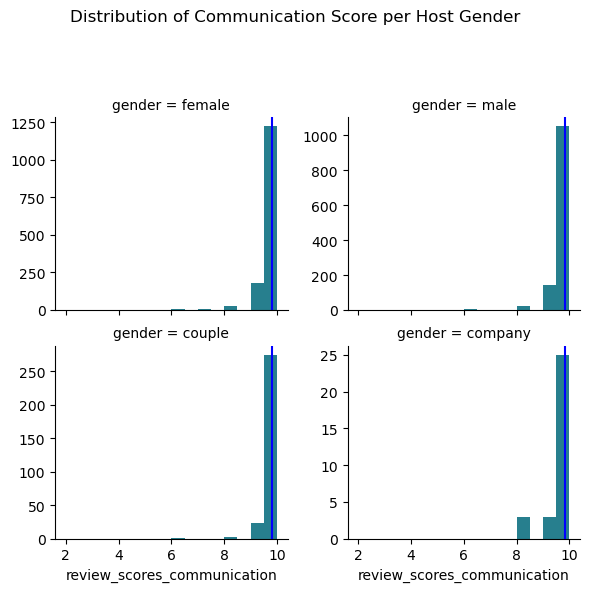

In [77]:
# FacetGrid for distribution of reading score according to EU and EFTA countries
binsize = 0.5
bin_edges = np.arange(2, seattle_listings_clean_gender['review_scores_communication'].max()+binsize, binsize)

g = sb.FacetGrid(data = seattle_listings_clean_gender, col='gender', col_wrap=2, sharey = False, margin_titles=True)

g.map(plt.hist, 'review_scores_communication',  bins = bin_edges, color = color_seattle[2])
g.refline(x=seattle_listings_clean_gender['review_scores_communication'].mean(), color='b', linestyle='-',)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Communication Score per Host Gender');

We can now pursue another question, namely whether some groups respond faster than others and whether this is also reflected in the communication review score.
To do this, we compare the`host_response_time`  with the`gender`  an check the mean of the `review_scores_communication`.

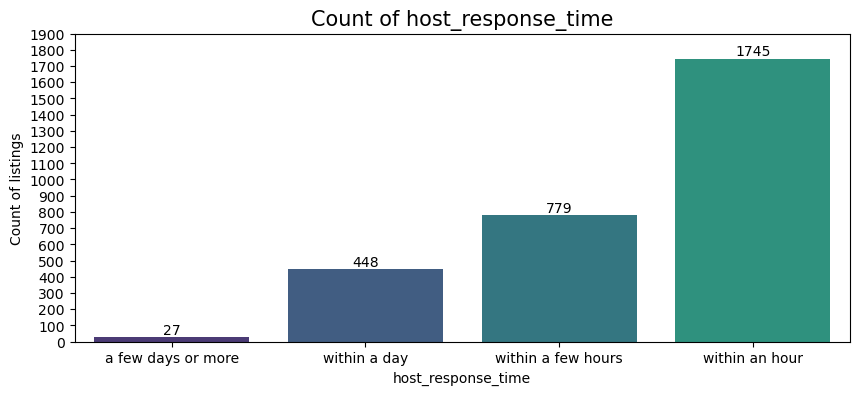

In [78]:
# plot countplot for host_response_time

plt.figure(figsize=[10,4])

ax = sb.countplot(data = seattle_listings_clean_gender, x='host_response_time', palette=color_seattle)
ax.bar_label(ax.containers[0])

#define title
ax.set_title('Count of host_response_time', fontsize=15)

#define yticks
plt.yticks(np.arange(0, 2000, step=100))

# define labels
plt.xlabel('host_response_time')
plt.ylabel('Count of listings')

plt.show();

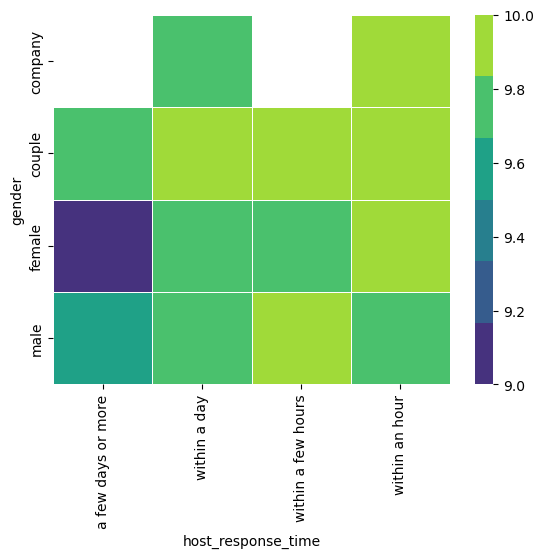

In [79]:
# create a pivot table of gender, host_response_time and the mean of the review_scores_communication
ct_counts_gen_com = pd.pivot_table(seattle_listings_clean_gender, values='review_scores_communication', index=['gender'],
columns=['host_response_time'], aggfunc="mean")

# show heatmap of pivot table
sb.heatmap(ct_counts_gen_com, linewidth=.5, cmap = color_seattle);

The matrix shows it very clearly - if you respond within an hour you will usually receive very good communication values. Only the male hosts received slightly worse values ​​than women, couples and companies in almost all categories. However, if the host takes several days to respond, you will get very bad reviews. Women in particular do very poorly here. Does this have something to do with the guests' expectation on womens communication skills and that men will be more forgiving of poor communication?

Here the values ​​are listed again in detail:


In [80]:
# show pivot table
ct_counts_gen_com

host_response_time,a few days or more,within a day,within a few hours,within an hour
gender,,,,
company,NaN,9.689655,NaN,10.000000
couple,9.75,9.888889,9.837209,9.931429
female,9.00,9.746667,9.705426,9.878079
male,9.50,9.822785,9.849673,9.814815


### Exploration of hosts `review_scores_cleanliness` and `cleaning_fee` per `gender`

Now let’s move on to the next question:
#### Do female hosts pay more attention to cleanliness?

In [81]:
#calculate the mean of review_scores_cleanliness for every group
seattle_listings_clean_gender.groupby(['gender'])['review_scores_cleanliness'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
company,31.0,9.903226,0.300537,9.0,10.0,10.0,10.0,10.0
couple,301.0,9.691030,0.600738,6.0,9.0,10.0,10.0,10.0
female,1443.0,9.576577,0.775978,4.0,9.0,10.0,10.0,10.0
male,1224.0,9.502451,0.851142,3.0,9.0,10.0,10.0,10.0


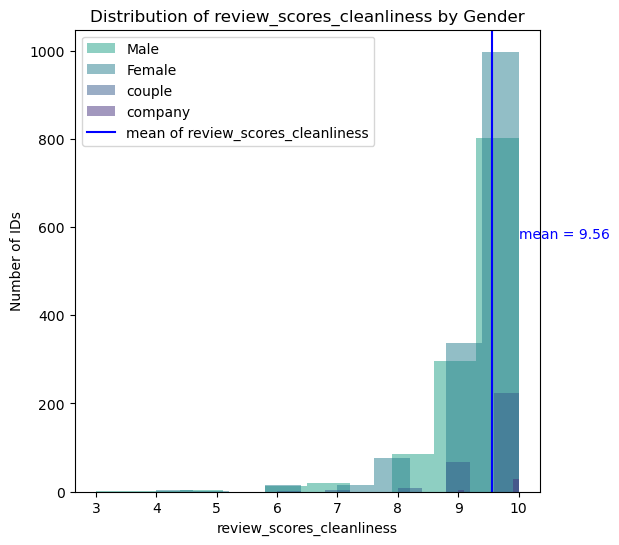

In [82]:
# Histogram for genders cleanliness scores

plt.figure(figsize=[6, 6])
plt.hist(data=seattle_listings_clean_gender[seattle_listings_clean_gender['gender']=='male'], x='review_scores_cleanliness',
         label='Male', alpha=0.5, color = color_seattle[3])
plt.hist(data=seattle_listings_clean_gender[seattle_listings_clean_gender['gender']=='female'], x='review_scores_cleanliness',  
         label='Female', alpha=0.5, color = color_seattle[2])
plt.hist(data=seattle_listings_clean_gender[seattle_listings_clean_gender['gender']=='couple'], x='review_scores_cleanliness',
         label='couple', alpha=0.5, color = color_seattle[1])
plt.hist(data=seattle_listings_clean_gender[seattle_listings_clean_gender['gender']=='company'], x='review_scores_cleanliness',  
         label='company', alpha=0.5, color = color_seattle[0])

# draw line at review_scores_cleanliness mean
plt.axvline(seattle_listings['review_scores_cleanliness'].mean(), color='b', label= 'mean of review_scores_cleanliness')

# add title
plt.title('Distribution of review_scores_cleanliness by Gender')

# add labels
plt.xlabel('review_scores_cleanliness')
plt.ylabel('Number of IDs')

# add text of review_scores_cleanliness mean
plt.text(10, 600, 'mean = {}'.format(round(seattle_listings['review_scores_cleanliness'].mean(),2)), 
         fontsize = 10, color = 'b',verticalalignment='top', horizontalalignment='left')

# add legend
plt.legend()

plt.show()

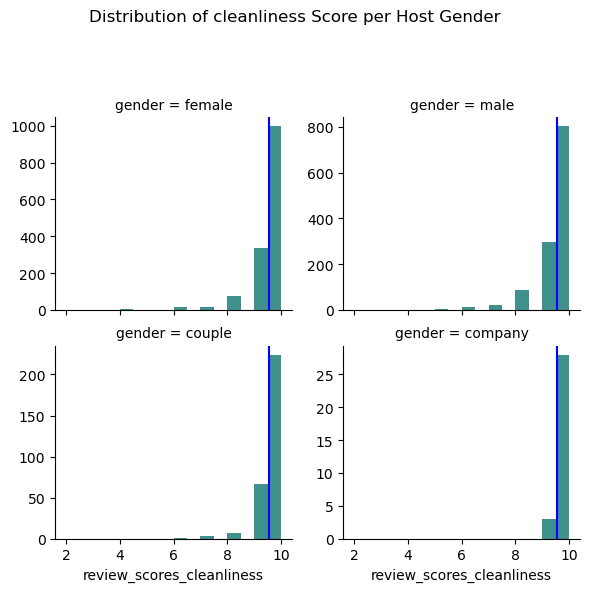

In [83]:
# FacetGrid for distribution of reading score according to EU and EFTA countries
binsize = 0.5
bin_edges = np.arange(2, seattle_listings_clean_gender['review_scores_cleanliness'].max()+binsize, binsize)

g = sb.FacetGrid(data = seattle_listings_clean_gender, col='gender', col_wrap=2, sharey = False, margin_titles=True)

g.map(plt.hist, 'review_scores_cleanliness',  bins = bin_edges, color = sb.color_palette("crest")[2])
g.refline(x=seattle_listings_clean_gender['review_scores_cleanliness'].mean(), color='b', linestyle='-',)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of cleanliness Score per Host Gender');

In fact, on average, female hosts achieve a higher score in the cleanliness index than male hosts. While women are slightly above the general average cleanliness rating with 9.58 points, men are significantly lower with 9.50 points. The absolute leaders in the cleanliness category with a dream rating of 9.90 points are companies.

What else could influence the cleanliness rating?

#### Are charging cleaning fees an indication of clean accommodation?

To evaluate this, I first divided the fees into roughly equal categories (no fee, low fee, medium fee, and high fee).

In [84]:
# define categories for the cleaning fee
def label_fee(row):
    '''
    INPUT:
    row - row of a pandas dataframe 
    
    OUTPUT:
    new category based on the cleaning_fee value
    '''
    
    if row['cleaning_fee'] == 0:
      return '0_no_fee'
    if row['cleaning_fee'] < 36:
      return '1_low_fee'
    if row['cleaning_fee'] > 70:
      return '3_high_fee' 
    return '2_medium_fee'

In [85]:
# save result of funcion label_fee in a new column
seattle_listings_clean_gender['cleaning_fee_cat']=seattle_listings_clean_gender.apply(label_fee, axis=1)

Now we use a heatmap to visualize the dependency between the amount of the fee, the gender and the average cleanliness rating achieved:


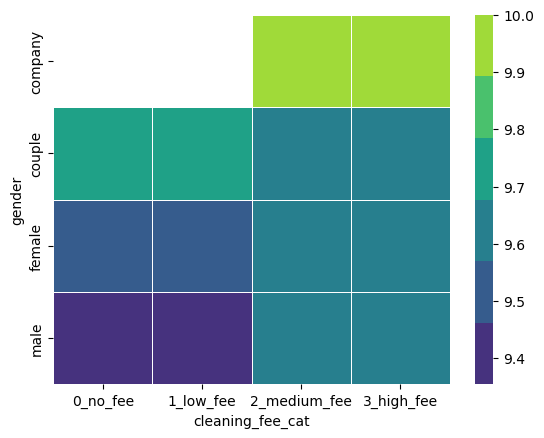

In [86]:
# create a pivot table of gender, host_response_time and the mean of the review_scores_communication
ct_counts_gen_clean = pd.pivot_table(seattle_listings_clean_gender, values='review_scores_cleanliness', index=['gender'],
columns=['cleaning_fee_cat'], aggfunc="mean")


# show heatmap of pivot table
sb.heatmap(ct_counts_gen_clean, linewidth=.5, cmap = color_seattle);

If you now compare the fees and types of hosts, you can see that accommodations without a cleaning fee perform significantly worse, especially with male hosts, than if a fee is charged. The only exception are couples: They do better in the lower segment of cleaning fees than in the higher areas.
Cleanliness is rated best by professional companies.

In [87]:
ct_counts_gen_clean

cleaning_fee_cat,0_no_fee,1_low_fee,2_medium_fee,3_high_fee
gender,,,,
company,NaN,NaN,10.000000,9.900000
couple,9.741379,9.780000,9.629630,9.580645
female,9.518732,9.521277,9.642667,9.623188
male,9.354232,9.451444,9.604651,9.647249


### Predict the listings price 

Now let's come to perhaps the most interesting question: If you want to offer a new accommodation as an Airbnb, which features such as neighborhood, amenities or other housing characteristics influence the price?

Before we investigate this question, let's take a closer look at a few of the features in the data set. 

#### Neighbourhood
Let's start with the neighborhood and examine what average price can be achieved per neighborhood.


<Figure size 1200x600 with 0 Axes>

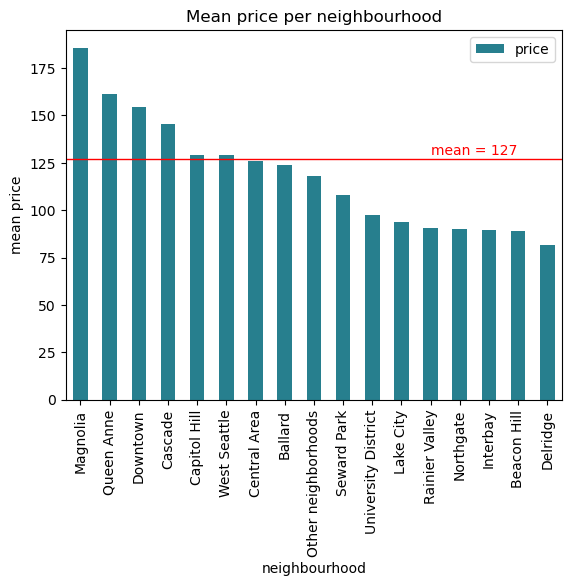

In [88]:
 # define mean price of all listings
mean_price = seattle_listings['price'].mean()

plt.figure(figsize=[12, 6])

# plot barchart
ax = seattle_listings.groupby(['neighbourhood_group_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).plot(
    kind='bar', color= color_seattle[2]);

#draw line with mean price of all listings
ax.hlines(y=mean_price,xmin = -1, xmax = 40, linewidth=1, color='r')

# add text
plt.text(12, 135, 'mean = {}'.format(round(mean_price)), fontsize = 10, color = 'r',verticalalignment='top', horizontalalignment='left')

#define title
plt.title('Mean price per neighbourhood')

#define rotation of labels
plt.xticks(rotation = 90)

#define labels
plt.xlabel('neighbourhood')
plt.ylabel('mean price')

plt.show();

Four neighborhoods, namely Magnolia, Queen Anne, Downtown and Cascade, achieve above-average prices. The lowest prices can be found in Delridge.

#### Amenities
Now let's take a closer look at the amenities. Unfortunately, these cannot be examined further without further data wrangling:


In [89]:
# show a sample of amenities
seattle_listings.amenities.sample(5)

3374    {TV,"Cable TV","Wireless Internet",Kitchen,"Fr...
2759                         {"Cable TV",Kitchen,Heating}
452     {TV,Internet,"Wireless Internet",Kitchen,"Free...
3509    {TV,"Cable TV",Internet,"Wireless Internet","A...
1262    {TV,Internet,"Wireless Internet","Wheelchair A...
Name: amenities, dtype: object

#### Data wrangling on amenities
We would like to evaluate the individual amenities. To do this, we have to separate them from one column into several.

To do this, we proceed as follows:
1. First we create a dataframe that only contains the relevant features and the price (`seattle_amenities_raw`).
2. We identify all unique anmenities. To do this, we create another auxiliary data set (`seattle_amenities_matrix`)
3. Now we extend a new data set with empty columns with the unique amenities as a heading. (`seattle_amenities_clean`)
4. Whenever the column heading is contained in the amenities entry, assign a 1, if not a 0.




In [90]:
# create a dataframe that only contains the relevant features and the price.
seattle_amenities_raw = seattle_listings[["price","host_response_time","neighbourhood_group_cleansed","property_type","room_type","bed_type","cancellation_policy"]]
seattle_amenities_raw['amenities'] = seattle_listings['amenities'].replace(['{','}',' ', '"'] ,['','','_',''], regex = True)
seattle_amenities_raw.head(3)

C:\Users\Birgit\AppData\Local\Temp\ipykernel_11404\1295689920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_amenities_raw['amenities'] = seattle_listings['amenities'].replace(['{','}',' ', '"'] ,['','','_',''], regex = True)


,price,host_response_time,neighbourhood_group_cleansed,property_type,room_type,bed_type,cancellation_policy,amenities
0,85.0,within a few hours,Queen Anne,Apartment,Entire home/apt,Real Bed,moderate,"TV,Cable_TV,Internet,Wireless_Internet,Air_Con..."
1,150.0,within an hour,Queen Anne,Apartment,Entire home/apt,Real Bed,strict,"TV,Internet,Wireless_Internet,Kitchen,Free_Par..."
2,975.0,within a few hours,Queen Anne,House,Entire home/apt,Real Bed,strict,"TV,Cable_TV,Internet,Wireless_Internet,Air_Con..."


In [91]:
# define matrix with all amenities split in columns
seattle_amenities_matrix = seattle_listings['amenities'].replace(['{','}',' ', '"'] ,['','','_',''], 
                                                                 regex = True).str.split(',', expand=True)
# show some values
seattle_amenities_matrix.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,TV,Cable_TV,Internet,Wireless_Internet,Air_Conditioning,Kitchen,Heating,Family/Kid_Friendly,Washer,Dryer,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless_Internet,Kitchen,Free_Parking_on_Premises,Buzzer/Wireless_Intercom,Heating,Family/Kid_Friendly,Washer,Dryer,Smoke_Detector,Carbon_Monoxide_Detector,First_Aid_Kit,Safety_Card,Fire_Extinguisher,Essentials,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Now we identify all unique anmenities:

In [92]:
# Define a DataFrame to start
values_all_columns =pd.DataFrame(seattle_amenities_matrix[0])
# Use pd.concat() to concatenate all columns and then apply unique()
for col in seattle_amenities_matrix.columns:
    values_all_columns = pd.concat([values_all_columns,seattle_amenities_matrix[col]])
unique_values_all_columns = values_all_columns[0].unique()
# Print the unique values
print(unique_values_all_columns)

['TV' 'Wireless_Internet' 'Internet' 'Cable_TV' '' 'Kitchen'
 'Wheelchair_Accessible' 'Free_Parking_on_Premises' 'Elevator_in_Building'
 'Pool' 'Pets_live_on_this_property' 'Air_Conditioning' None 'Breakfast'
 'Gym' 'Heating' 'Washer' 'Smoke_Detector' 'Indoor_Fireplace'
 'Pets_Allowed' 'Buzzer/Wireless_Intercom' 'Smoking_Allowed' 'Dog(s)'
 'Hot_Tub' 'Cat(s)' 'Family/Kid_Friendly' 'Dryer' 'Essentials' 'Shampoo'
 'Carbon_Monoxide_Detector' 'First_Aid_Kit' 'Fire_Extinguisher' 'Doorman'
 'Washer_/_Dryer' 'Suitable_for_Events' 'Other_pet(s)' '24-Hour_Check-in'
 'Safety_Card' 'Hair_Dryer' 'Hangers' 'Iron' 'Laptop_Friendly_Workspace'
 'Lock_on_Bedroom_Door']


The result still contains empty values, so I define a cleaned list:

In [93]:
# define a cleaned list of unique values
extras_unique_clean = ['Laptop_Friendly_Workspace', 'Iron', 'Hair_Dryer', 'Hangers',
       '24-Hour_Check-in', 'Shampoo', 'Essentials',
       'Lock_on_Bedroom_Door', 'Fire_Extinguisher', 'Safety_Card',
       'Carbon_Monoxide_Detector', 'First_Aid_Kit', 'Smoke_Detector',
       'Dryer', 'Washer', 'Suitable_for_Events', 'Family/Kid_Friendly',
       'Heating', 'Buzzer/Wireless_Intercom', 'Hot_Tub',
       'Elevator_in_Building', 'Indoor_Fireplace', 'Cat(s)', 'Dog(s)',
       'Gym', 'Pets_live_on_this_property', 'Breakfast', 'Doorman',
       'Other_pet(s)', 'Pets_Allowed', 'Free_Parking_on_Premises',
       'Smoking_Allowed', 'Kitchen', 'Pool', 'Wheelchair_Accessible',
       'Air_Conditioning', 'Wireless_Internet', 'Washer_/_Dryer',
       'Internet', 'Cable_TV', 'TV']

Now we extend a new data set with empty columns with the unique amenities as a heading. Whenever the column heading is contained in the amenities entry, assign a 1, if not a 0.

In [94]:
# define a copy of our raw dataframe
seattle_amenities_clean = seattle_amenities_raw.copy()
# define unique empty columns with amenities
seattle_amenities_clean[extras_unique_clean] = None
# Whenever the column heading is contained in the amenities entry, assign a 1 to the column, if not a 0
for i in extras_unique_clean:
    seattle_amenities_clean[i] = seattle_amenities_clean['amenities'].apply(lambda x: 1 if i in x else 0)
# save dataframe and drop column amenities
seattle_amenities_clean=seattle_amenities_clean.drop(columns=['amenities'])
# show some values
seattle_amenities_clean.head(5)

,price,host_response_time,neighbourhood_group_cleansed,property_type,room_type,bed_type,cancellation_policy,Laptop_Friendly_Workspace,Iron,Hair_Dryer,Hangers,24-Hour_Check-in,Shampoo,Essentials,Lock_on_Bedroom_Door,Fire_Extinguisher,Safety_Card,Carbon_Monoxide_Detector,First_Aid_Kit,Smoke_Detector,Dryer,Washer,Suitable_for_Events,Family/Kid_Friendly,Heating,Buzzer/Wireless_Intercom,Hot_Tub,Elevator_in_Building,Indoor_Fireplace,Cat(s),Dog(s),Gym,Pets_live_on_this_property,Breakfast,Doorman,Other_pet(s),Pets_Allowed,Free_Parking_on_Premises,Smoking_Allowed,Kitchen,Pool,Wheelchair_Accessible,Air_Conditioning,Wireless_Internet,Washer_/_Dryer,Internet,Cable_TV,TV
0,85.0,within a few hours,Queen Anne,Apartment,Entire home/apt,Real Bed,moderate,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1
1,150.0,within an hour,Queen Anne,Apartment,Entire home/apt,Real Bed,strict,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,975.0,within a few hours,Queen Anne,House,Entire home/apt,Real Bed,strict,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1
4,450.0,within an hour,Queen Anne,House,Entire home/apt,Real Bed,strict,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1
5,120.0,within an hour,Queen Anne,House,Private room,Real Bed,strict,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [95]:
# check on null values
seattle_amenities_clean.isnull().any().sum()

0

#### Proportion of the different amenities
Now we would like to know which amenities are offered particularly often, i.e. are so-called “must haves”, and which are less common.
To do this, I define a data set that only contains amenities.

In [96]:
# define a data set that only contains amenities.
seattle_amenities_hist = seattle_amenities_clean.drop(columns=["price","host_response_time","neighbourhood_group_cleansed",
                                                               "property_type","room_type","bed_type","cancellation_policy" ])

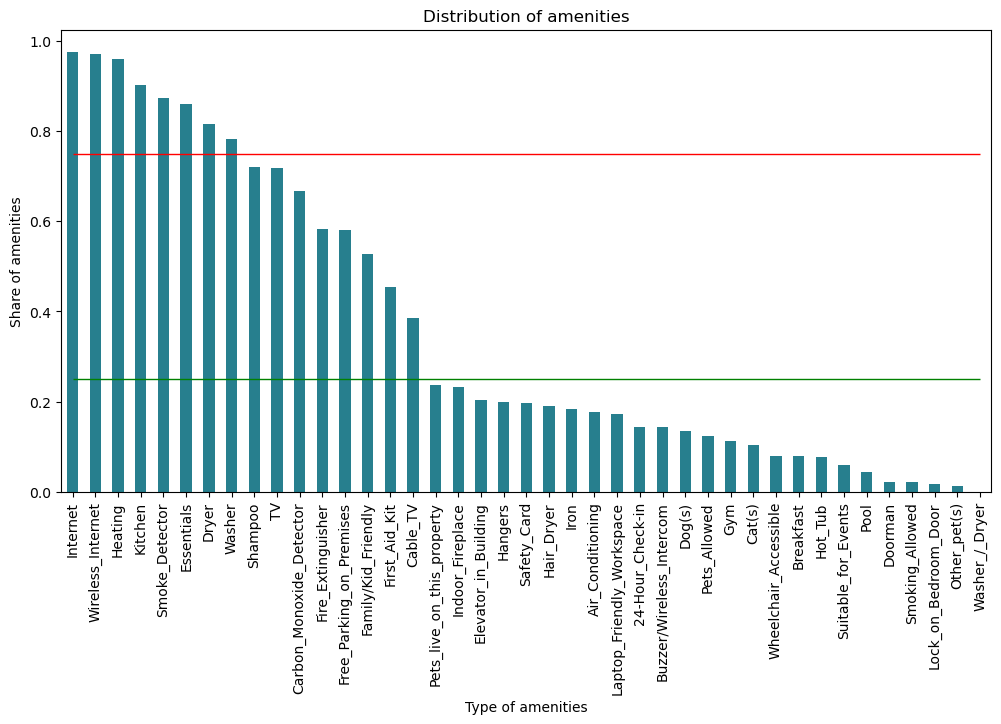

In [97]:
# display propotion of amenities in a histogram
plt.figure(figsize=[12, 6])

# plot histogram
ax = seattle_amenities_hist.mean().sort_values(ascending=False).plot(kind='bar', color= color_seattle[2])


# add lines at 75% and 25%
ax.hlines(y=0.75,xmin = 0, xmax = 40, linewidth=1, color='r')
ax.hlines(y=0.25,xmin = 0, xmax = 40, linewidth=1, color='g')

# add title
plt.title('Distribution of amenities')

# add xticks 
plt.xticks(rotation = 90)

# add labels
plt.xlabel('Type of amenities')
plt.ylabel('Share of amenities')

plt.show()

Internet, heating and a kitchen are “must haves” that hardly any guest has to go without. I find it surprising that more than 25% of all accommodations do not have a TV. Smokers have a hard time on Airbnb. Smoking is only allowed in very few accommodations. Exclusive features such as a pool, a hot tub, or the presence of a doorman are also rarely found.

#### Predicting the price


One of the main ways for working with categorical variables is using 0, 1 encodings.  In this technique, we create a new column for every level of the categorical variable. Let's start with adding dummy variables for the categorical variables into the model:

In [98]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = ["host_response_time","neighbourhood_group_cleansed","property_type","room_type","bed_type","cancellation_policy"]

def create_dummy_df(df, cat_cols):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', dtype=int, drop_first=False)], axis=1)
        except:
            continue
    return df

In [99]:
# Use newly created function
seattle_listings_cat = create_dummy_df(seattle_amenities_clean, cat_cols_lst) 

# Show shape and a header of seattle_listings_cat to check
print("The size of the dataframe is {}".format(seattle_listings_cat.shape))
seattle_listings_cat.head()

The size of the dataframe is (3171, 90)


,price,Laptop_Friendly_Workspace,Iron,Hair_Dryer,Hangers,24-Hour_Check-in,Shampoo,Essentials,Lock_on_Bedroom_Door,Fire_Extinguisher,Safety_Card,Carbon_Monoxide_Detector,First_Aid_Kit,Smoke_Detector,Dryer,Washer,Suitable_for_Events,Family/Kid_Friendly,Heating,Buzzer/Wireless_Intercom,Hot_Tub,Elevator_in_Building,Indoor_Fireplace,Cat(s),Dog(s),Gym,Pets_live_on_this_property,Breakfast,Doorman,Other_pet(s),Pets_Allowed,Free_Parking_on_Premises,Smoking_Allowed,Kitchen,Pool,Wheelchair_Accessible,Air_Conditioning,Wireless_Internet,Washer_/_Dryer,Internet,...,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,85.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,150.0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,975.0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,450.0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,120.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


We have introduced a large number of effects into the model.  If the sample size is not large enough, we might not be able to estimate the impact of each of these variables on the response variable price.  There are some rules of thumb that suggest 10 data points for each variable one adds to the model (that is 10 rows for each column). Our size of the dataframe is 3171 rows to 90 columns, that means we have about 35 rows per feature, which seems to be okay.

Now let's train the model:

In [100]:
def clean_fit_linear_mod(df, response_col, test_size, rand_state):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    # Split into explanatory and response variables
    y = df[response_col]
    X = df.drop([response_col], axis=1)

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

    #Instantiate the model
    lm_model = RandomForestRegressor(n_estimators= 200, random_state=42)
    
    #Fit the model
    lm_model.fit(X_train, y_train) 

    #Predict using the model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using the model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(seattle_listings_cat, 'price', test_size=.2, rand_state=42 )

In [101]:
print("The rsquared on the training data was {:.2f}.  The rsquared on the test data was {:.2f}.".format(train_score, test_score))

The rsquared on the training data was 0.90.  The rsquared on the test data was 0.34.


We can look at the size of the coefficients in the model as an indication of the impact of each variable on the price. The larger the coefficient, the larger the expected impact on the price:

In [102]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.feature_importances_
 
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.feature_importances_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs
78,room_type_Entire home/apt,0.208838
21,Indoor_Fireplace,0.063920
71,property_type_House,0.037594
88,cancellation_policy_strict,0.032242
57,neighbourhood_group_cleansed_Queen Anne,0.030891
11,First_Aid_Kit,0.029631
43,host_response_time_within a few hours,0.026017
5,Shampoo,0.025604
39,Cable_TV,0.023658
8,Fire_Extinguisher,0.022315


We can also display the top 20 in a bar chart:

Text(0.5, 1.0, 'Global Feature Importance Top 20')

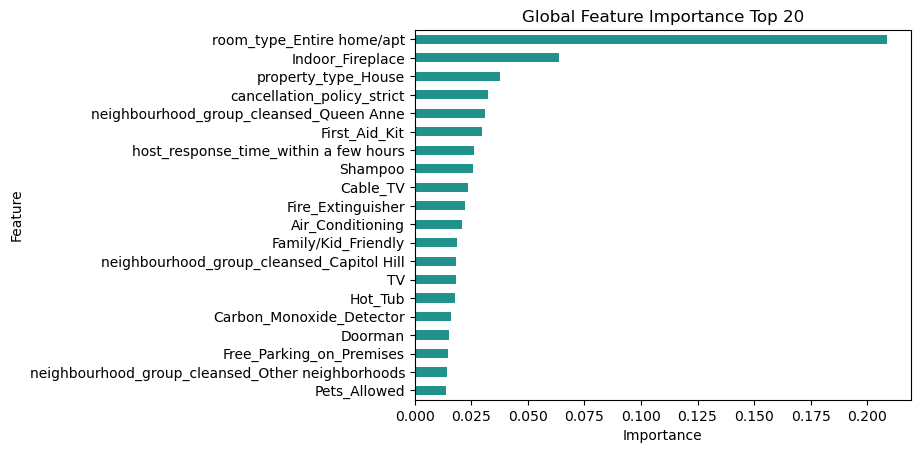

In [103]:
# define a series containing the coefficients of the linear model and the feature names as index
global_importances = pd.Series(lm_model.feature_importances_, index=X_train.columns)

#sort the values
global_importances.sort_values(ascending=True, inplace=True)

# as used ascending=True the top 20 are in the tail 
global_importances_high= global_importances.tail(20)

#plot a horizontal bar
global_importances_high.plot.barh(color='#21918c')
#

# define labels
plt.xlabel("Importance")
plt.ylabel("Feature")

#define title
plt.title("Global Feature Importance Top 20")

There are some findings that surprised me as to which categories can influence the price to be achieved. 
Basically, having your own apartment for yourself or even a whole house influences the price, this is not very surprising. Further up, there are exclusive features, such as a fireplace. But there are also things that the host itself can influence that obviously affect the price, namely a response time within a few hours and a strict cancellation policy.
A downside of this method is that it doesn’t provide any information about the direction of the relationship between the feature and the target. 
Therefore, we take a closer look at the price distribution for the two host-specific features


<Figure size 1200x600 with 0 Axes>

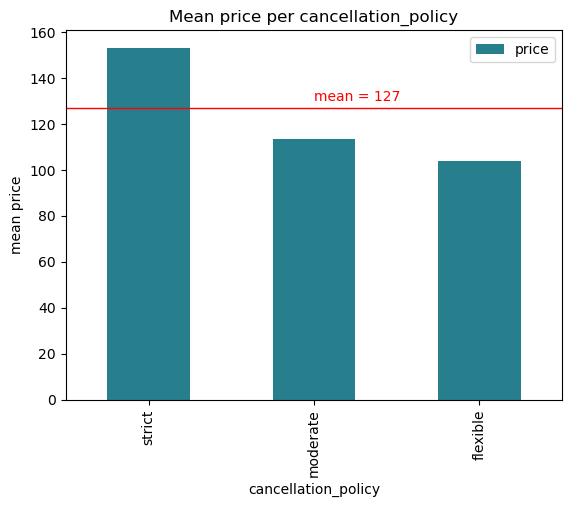

In [104]:
# define mean price of all listings
mean_price = seattle_listings['price'].mean()

plt.figure(figsize=[12, 6])

# plot barchart
ax1 = seattle_listings.groupby(['cancellation_policy'])[['price']].mean().sort_values(by='price',ascending=False).plot(
    kind='bar', color= color_seattle[2]);

#draw line with mean price of all listings
ax1.hlines(y=mean_price,xmin = -1, xmax = 10, linewidth=1, color='r')

# add text
plt.text(1, 135, 'mean = {}'.format(round(mean_price)), fontsize = 10, color = 'r',verticalalignment='top', horizontalalignment='left')

#define title
plt.title('Mean price per cancellation_policy')

#define rotation of labels
plt.xticks(rotation = 90)

#define labels
plt.xlabel('cancellation_policy')
plt.ylabel('mean price')

plt.show();


<Figure size 1200x600 with 0 Axes>

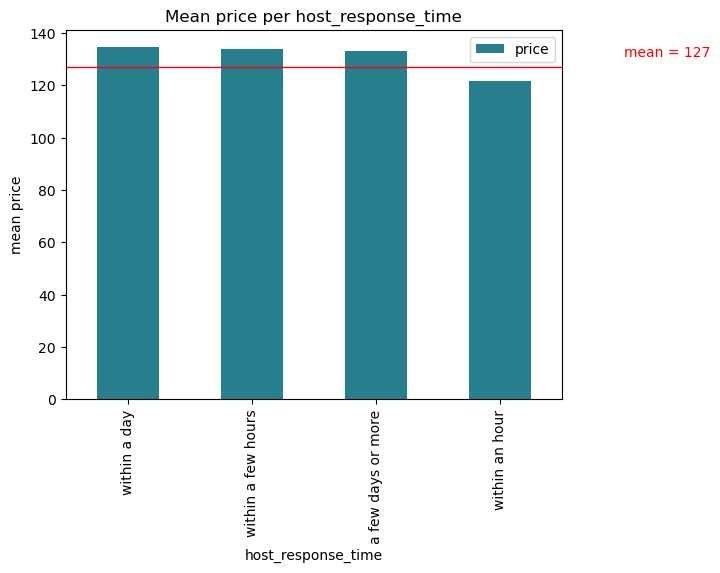

In [105]:
# define mean price of all listings
mean_price = seattle_listings['price'].mean()

plt.figure(figsize=[12, 6])

# plot barchart
ax = seattle_listings.groupby(['host_response_time'])[['price']].mean().sort_values(by='price',ascending=False).plot(
    kind='bar', color= color_seattle[2]);

#draw line with mean price of all listings
ax.hlines(y=mean_price,xmin = -1, xmax = 10, linewidth=1, color='r')

# add text
plt.text(4, 135, 'mean = {}'.format(round(mean_price)), fontsize = 10, color = 'r',verticalalignment='top', horizontalalignment='left')

#define title
plt.title('Mean price per host_response_time')

#define rotation of labels
plt.xticks(rotation = 90)

#define labels
plt.xlabel('host_response_time')
plt.ylabel('mean price')

plt.show();

If you compare the features host respose time and cancellation policy with the average price, the accommodations with a strict policy achieve a higher price on average, but if you allow several hours to answer a request, this is an indication of a lower priced accommodation. Both features seem to be relevant to the price assessment, but in different directions.

## Creation of a word cloud picture based on the reviews of the best rated listings

I need an attractive image for our blog post. Here I thought about creating a word cloud. The word cloud should contain the most common words used in the guest reviews of the best-rated accommodations.

Here, data wrangling must first be carried out again in order to link the data from the listings with the review.


#### Data wrangling for merge
First, we reduce the seattle_listings file to the relevant information: the ID as a reference between the two data sets and the overall review score of the accommodation.

In [106]:
# crate a dataframe, that only contains id and review_scores_rating
# rename id to listing_id for later merge with seattle_reviews
seattle_id_rating_only = seattle_listings[['id', 'review_scores_rating']].rename(columns = {"id": "listing_id"})

Now let's look at which accommodations are among the best. To do this, we look at the histogram of the review_score_rating. Ratings above the 75% quartile are eligible for the word cloud.

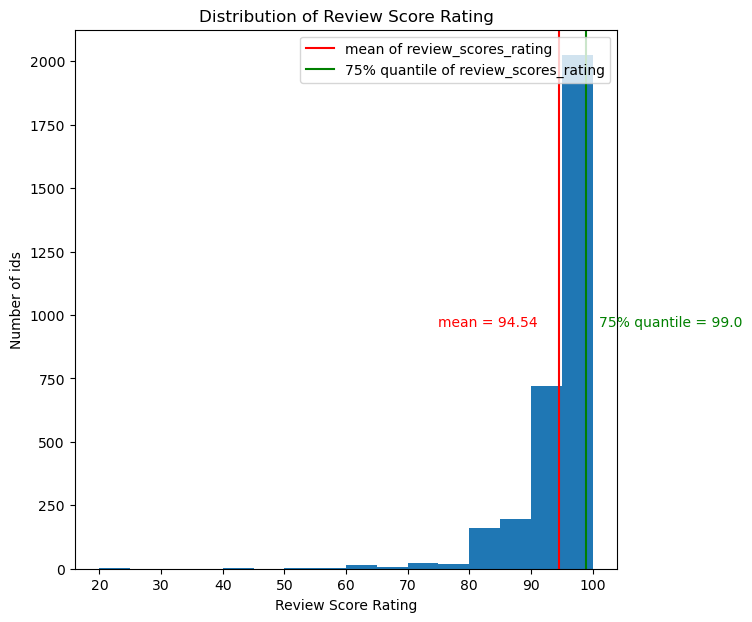

In [107]:
# plot histogram including the mean as a line
binsize = 5
bins = np.arange(seattle_id_rating_only['review_scores_rating'].min(), seattle_id_rating_only['review_scores_rating'].max()+binsize, binsize)

plt.figure(figsize=[7, 7])

#plot histogram
plt.hist(data=seattle_id_rating_only, x='review_scores_rating', bins = bins)

#define title
plt.title('Distribution of Review Score Rating')

#define labels
plt.xlabel('Review Score Rating')
plt.ylabel('Number of ids')

#plot mean and 75% quantile as reference line
plt.axvline(seattle_id_rating_only['review_scores_rating'].mean(), color='r', label= 'mean of review_scores_rating')
plt.axvline(seattle_id_rating_only['review_scores_rating'].quantile(0.75), color='g', label= '75% quantile of review_scores_rating')

# display values of mean and 75% quantile
plt.text(75, 1000, 'mean = {}'.format(round(seattle_id_rating_only['review_scores_rating'].mean(),2)), fontsize = 10, 
         color = 'r',verticalalignment='top', horizontalalignment='left')
plt.text(101, 1000, '75% quantile = {}'.format(round(seattle_id_rating_only['review_scores_rating'].quantile(0.75),2)), fontsize = 10, 
         color = 'g',verticalalignment='top', horizontalalignment='left')

# display legend of the line
plt.legend(loc='upper right')

plt.show();

We now save the best accommodations with a score of 99 and above in a separate data frame for further processing.

In [108]:
#save accommodations with a review_scores_rating >= 99.0 in a separate data frame
seattle_rating_high = seattle_id_rating_only.query('review_scores_rating >= 99.0')

In [109]:
# show the value counts of the review_scores_rating
seattle_rating_high.review_scores_rating.value_counts()

review_scores_rating
100.0    781
99.0     146
Name: count, dtype: int64

Now we merge the listings data of the best-rated accommodations with the associated reviews using the listings ID. We delete the NaN values.

In [110]:
# merge the two dataframes and drop NaN's
seattle_rating_high_merge = seattle_reviews_clean.merge(seattle_rating_high, how = 'left').dropna()

In [111]:
# show the details of the merged dataframe
seattle_rating_high_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10425 entries, 65 to 84848
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   listing_id            10425 non-null  int64         
 1   id                    10425 non-null  int64         
 2   date                  10425 non-null  datetime64[ns]
 3   reviewer_id           10425 non-null  int64         
 4   reviewer_name         10425 non-null  object        
 5   comments              10425 non-null  object        
 6   review_scores_rating  10425 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 651.6+ KB


Now let's create the word cloud. For a suitable silhouette, we upload an image of the Seattle skyline.

In [112]:
# open image of the Seattle skyline
seattle_mask = np.array(Image.open('./seattle_skyline.png'))

In [113]:
# join all review comments
text_high = " ".join(review for review in seattle_rating_high_merge.comments)
print ("There are {} words in the combination of all review.".format(len(text_high)))

There are 4391168 words in the combination of all review.


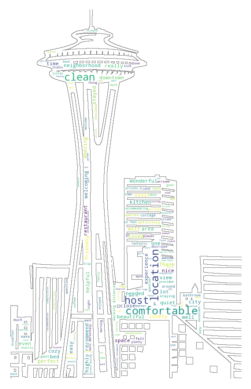

In [114]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["stay", "Seattle", "place", "everything", "apartment","home", "house", "room", "great", "made", "day", "need"])

# Generate a word cloud image
wordcloud = WordCloud(max_words=300, stopwords=stopwords,background_color="white", 
                      mask = seattle_mask, max_font_size=100, contour_width=0.25, contour_color='grey'
                     ).generate(text_high)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
# Save the image 
wordcloud.to_file("seattle_review.png")

## Conclusions

#### Do female hosts perform better than men when it comes to communication?
- In the majority of listed accommodations, the hosts are female with a 48.1% share and 40.8% are male. The next largest group is made up of couples with almost 10%, while professional companies form the clear minority with only 1% of the listed accommodations.
- On average, a host scores 9.82 points in the communication rating.
- Surprisingly, the female hosts actually score fewer points on average than the male ones. The couples clearly emerge as winners; they achieve above-average values.

#### Do female hosts respond to queries faster than other groups?
- If you respond within an hour you will usually receive very good communication values.
- Only the male hosts received slightly worse values ​​than women, couples and companies in almost all categories.
- However, if the host takes several days to respond, you will get very bad reviews. Women in particular do very poorly here.


#### Do female hosts pay more attention to cleanliness?
- In fact, on average, female hosts achieve a higher score in the cleanliness index than male hosts. While women are slightly above the general average cleanliness rating with 9.58 points, men are significantly lower with 9.50 points. The absolute leaders in the cleanliness category with a dream rating of 9.90 points are companies.

#### Are charging cleaning fees an indication of clean accommodation?
- If you  compare the fees and types of hosts, you can see that accommodations without a cleaning fee perform significantly worse, especially with male hosts, than if a fee is charged. The only exception are couples: They do better in the lower segment of cleaning fees than in the higher areas.
Cleanliness is rated best by professional companies.

#### What features have the most impact on the listings price?
- Four neighborhoods, namely Magnolia, Queen Anne, Downtown and Cascade, achieve above-average prices. The lowest prices can be found in Delridge.
  
- Internet, heating and a kitchen are “must haves” that hardly any guest has to go without. I find it surprising that more than 25% of all accommodations do not have a TV. Smokers have a hard time on Airbnb. Smoking is only allowed in very few accommodations. Exclusive features such as a pool, a hot tub, or the presence of a doorman are also rarely found.
  
- Basically, having your own apartment for yourself or even a whole house influences the price, this is not very surprising.
  
- Further up, there are exclusive features, such as a fireplace. But there are also things that the host itself can influence that obviously affect the price, namely a response time within a few hours and a strict cancellation policy.
  
- A downside of this method is that it doesn’t provide any information about the direction of the relationship between the feature and the target.
- If you compare the features host respose time and cancellation policy with the average price, the accommodations with a strict policy achieve a higher price on average, but if you allow several hours to answer a request, this is an indication of a lower priced accommodation. Both features seem to be relevant to the price assessment, but in different directions.

## References

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


https://github.com/mwaskom/seaborn/issues/1853

https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
    

https://stackoverflow.com/questions/51891370/draw-a-line-at-specific-position-annotate-a-facetgrid-in-seaborn

https://forecastegy.com/posts/feature-importance-in-random-forests/